In [1]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
import random 

from pprint import pprint
import pytz

In [2]:
# Loading data
reducedData=pd.read_csv('../data/elecciones2021/BD_General_nuevo.csv')  
# reducedData=reducedData.sort_values(by='Time',ascending=True)
reducedData=reducedData.sort_values(by='Time',ascending=True).reset_index(drop = True)

In [3]:
reducedData

,Unnamed: 0,Tweet ID,User ID,User,Time,Party/Search,Allegiance,Text
0,3911043,1333561477295267841,118898981,Jordi_Co,2020-12-01T00:00:07.000Z,PRD,0.673136,"Bajo su análisis, Andrés representa a lo peor ..."
1,3911042,1333561484597735426,328702627,benja21_3,2020-12-01T00:00:08.000Z,PRD,0.969530,"La alianza del PAN,PRI y PRD más todos los que..."
2,2209701,1333561512170930183,83678658,ursusnero,2020-12-01T00:00:15.000Z,PRI,0.180877,"""Apartidistas"" → ¡Tomen partido contra Morena!..."
3,3911041,1333561545377378305,1104428775348076544,Roberto89123572,2020-12-01T00:00:23.000Z,PRD,0.254450,@LizLizMarie077 @BeanaNova 1 LA cura para bor...
4,2209700,1333561692958167041,2455465874,PRImxJaliscoAC,2020-12-01T00:00:58.000Z,PRI,0.938383,"Cuando los militantes como Gustavo y Rosalina,..."
...,...,...,...,...,...,...,...,...
6356173,5324126,1401765862445563905,1219298739959083011,Laura3442005796,2021-06-07T04:59:59.000Z,PVEM,0.009221,"""Vendidos"":\nPor quienes se refieren así de la..."
6356174,3911044,1401765860402896898,1265018009472561152,liz99822758,2021-06-07T04:59:59.000Z,PRD,0.034014,El PAN dice que gano\nEl PRI dice que gano\nEl...
6356175,1158349,1401765860809785344,1155266680605614082,olores_y,2021-06-07T04:59:59.000Z,PAN,0.296407,@chincualuda @ElFinanciero_Mx @makugo @AccionN...
6356176,4466587,1401765860402896898,1265018009472561152,liz99822758,2021-06-07T04:59:59.000Z,PRD,0.034014,El PAN dice que gano\nEl PRI dice que gano\nEl...


In [4]:
# Convert dataframe to time series
date = pd.to_datetime(reducedData['Time'])
date_Mexico = pd.Series(pd.DatetimeIndex(date).tz_convert('America/Mexico_City'))

In [5]:
date_Mexico_week = date_Mexico.dt.isocalendar().week
date_Mexico_year = date_Mexico.dt.isocalendar().year

Text(0, 0.5, 'Number of Tweets')

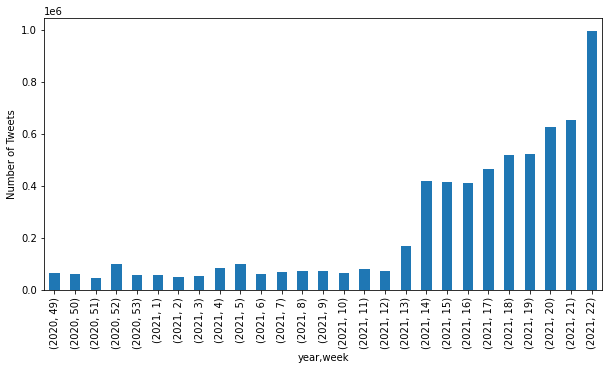

In [6]:
# Counting and plotting numbers of Tweets
week_groups_Mexico = date_Mexico.groupby([date_Mexico_year,date_Mexico_week]).count()
week_groups_Mexico.plot(kind='bar',figsize=(10,5),legend=None)
plt.ylabel('Number of Tweets')

Text(0, 0.5, 'Number of Tweets')

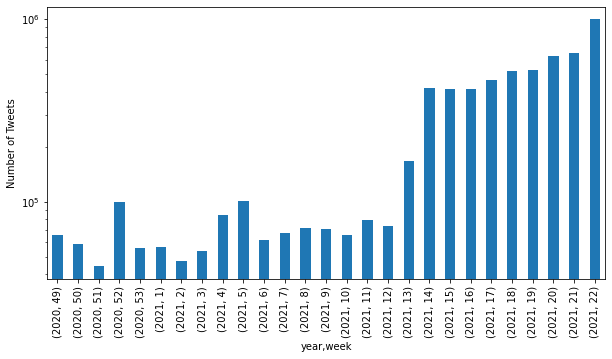

In [7]:
week_groups_Mexico = date_Mexico.groupby([date_Mexico_year,date_Mexico_week]).count()
week_groups_Mexico.plot(kind='bar',figsize=(10,5),legend=None)
plt.yscale('log')
plt.ylabel('Number of Tweets')
# plt.ylim([10**3, 2*10**5])

Text(0, 0.5, 'Cumulative Number of Tweets')

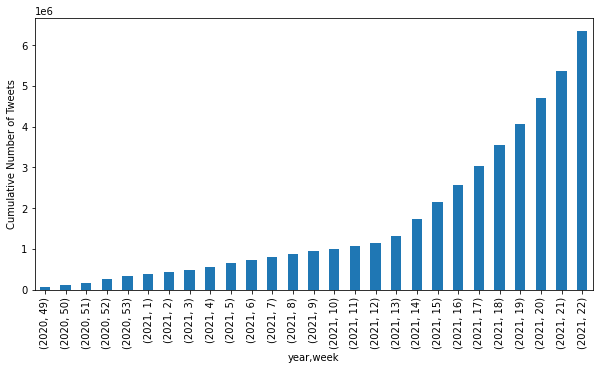

In [8]:
week_groups_Mexico.cumsum().plot(kind='bar',figsize=(10,5),legend=None)
plt.ylabel('Cumulative Number of Tweets')

In [31]:
reducedData['User ID'][0:10]

0              118898981
1              328702627
2               83678658
3    1104428775348076544
4             2455465874
5             3709274244
6             2455465874
7             2455465874
8    1064558044082774016
9    1259280663343235075
Name: User ID, dtype: int64

In [26]:
u, indices = np.unique(reducedData['User ID'], return_index=True)

In [33]:
print(u)
print(indices)
print()
print(reducedData['Time'][indices])

[               3968                5803               12996 ...
 1401737185649434627 1401741951259627524 1401757743887753216]
[6205377 3996882 3882061 ... 6311514 6317279 6343540]

6205377    2021-06-06T22:45:53.000Z
3996882    2021-05-15T19:03:44.000Z
3882061    2021-05-14T01:45:46.000Z
2407216    2021-04-23T15:43:06.000Z
377564     2021-01-11T01:04:46.000Z
                     ...           
6333786    2021-06-07T04:11:19.000Z
6298756    2021-06-07T02:38:11.000Z
6311514    2021-06-07T03:10:34.000Z
6317279    2021-06-07T03:26:59.000Z
6343540    2021-06-07T04:33:49.000Z
Name: Time, Length: 543131, dtype: object


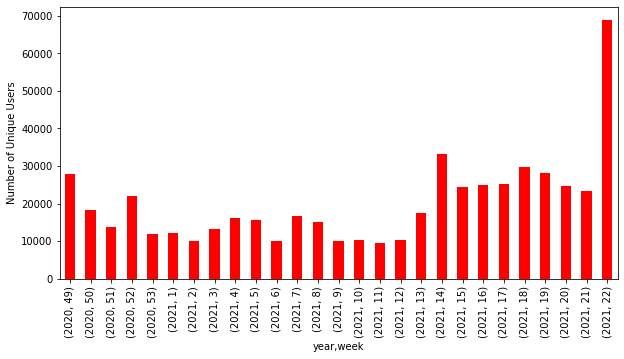

In [11]:
week_groups_Mexico_unique_users = date_Mexico[indices].groupby([date_Mexico_year[indices],date_Mexico_week[indices]]).count()
week_groups_Mexico_unique_users.plot(kind='bar', color='r',figsize=(10,5),legend=None)
plt.ylabel('Number of Unique Users')
plt.savefig('unique_users.png')

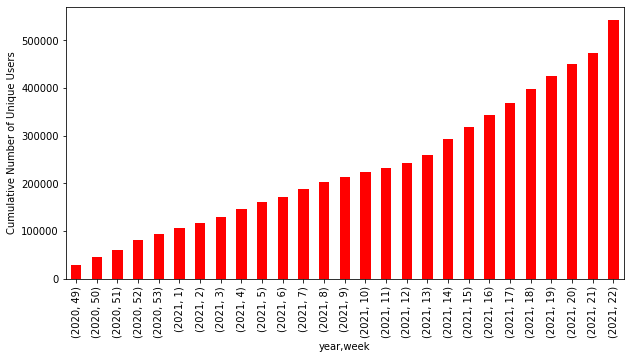

In [12]:
week_groups_Mexico_unique_users.cumsum().plot(kind='bar', color='r',figsize=(10,5),legend=None)
plt.ylabel('Cumulative Number of Unique Users')
plt.savefig('cum_unique_users.png')

In [13]:
# Some checks
number_of_Tweets = len(reducedData[reducedData.columns[2]])
number_of_unique_users = len(np.unique(reducedData[reducedData.columns[2]]))
print(number_of_Tweets)
print(number_of_unique_users)
print(number_of_Tweets/number_of_unique_users)

6356178
543131
11.702845169949791
